In [3]:
import numpy as np

## КРИТЕРИЙ ХИ-КВАДРАТ

Критерий хи-квадрат используют, чтобы определить связь между двумя категориальными переменными. Это одновыборочный тест: мы анализируем взаимосвязь между двумя признаками объектов одной выборки.

Оператор сотовой связи хочет узнать, есть ли связь между тарифом, который выбрал клиент, и наличием у него детей.

Были собраны необходимые данные по 39 случайным клиентам.

Уровень значимости необходимо взять равным 0.05.

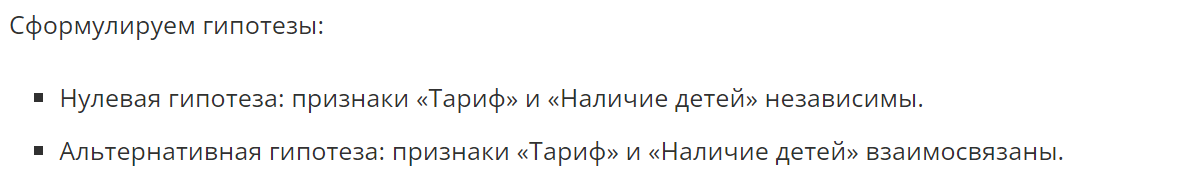

In [5]:
import scipy.stats as stats
import pandas as pd

# задаём уровень значимости
alpha = 0.05 

data = pd.read_csv('data/cat_variables_tarif_children.zip')

# вычисляем таблицу сопряжённости
table = pd.crosstab(data['Тариф'], data['Наличие детей'])

# проводим тест
_, p, _, _ = stats.chi2_contingency(table)

print(f'p-value = {p:.3f}')

# интерпретируем результат
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу.')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.')

p-value = 0.373
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


## КРИТЕРИЙ МАК-НЕМАРА

Критерий Мак-Немара — это двухвыборочный тест для связанных выборок, который позволяет сравнить бинарные признаки.

Оператор сотовой связи хочет увеличить долю клиентов, которые пользуются мобильным приложением. Для этого провели соответствующую рекламную кампанию. Необходимо узнать, изменилась ли доля клиентов, пользующихся приложением, после проведения рекламной кампании.

Были собраны данные об использовании приложения по 30 случайным клиентам до и после рекламной кампании.

Уровень значимости необходимо взять равным 0.05.

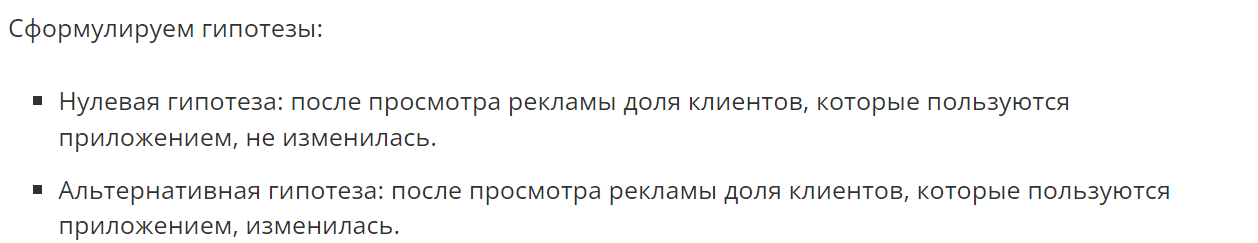

In [11]:
from statsmodels.stats.contingency_tables import mcnemar
import pandas as pd

# задаём уровень значимости
alpha = 0.05 

data = pd.read_csv('data/cat_variables_usage.zip')

# вычисляем таблицу сопряжённости
table = pd.crosstab(data['До'], data['После'])

# проводим тест
res = mcnemar(table)

# извлекаем значение p-value из результатов теста
p = res.pvalue

print(f'p-value = {p:.3f}')

# интерпретируем результат
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу.')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.')

p-value = 0.013
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


### Задание 9.2

Компания собирает обратную связь от клиентов. Чтобы увеличить количество ответов, переработали форму обратной связи. У 30 случайных клиентов запросили обратную связь, используя сначала старую, а затем — новую форму. Наличие обратной связи обозначили как 'Есть', отсутствие — как 'Нет'. Полученные данные в виде pandas DataFrame data:

In [13]:
data = pd.DataFrame([['Есть', 'Есть'], ['Есть', 'Нет'],
                     ['Нет', 'Есть'], ['Нет', 'Есть'],
                     ['Нет', 'Нет'], ['Есть', 'Есть'],
                     ['Нет', 'Есть'], ['Нет', 'Есть'],
                     ['Нет', 'Есть'], ['Нет', 'Есть'],
                     ['Нет', 'Есть'], ['Нет', 'Есть'],
                     ['Есть', 'Есть'], ['Нет', 'Есть'],
                     ['Нет','Нет'], ['Нет', 'Нет'],
                     ['Нет', 'Нет'], ['Есть', 'Нет'],
                     ['Есть', 'Есть'], ['Нет', 'Нет'],
                     ['Нет', 'Есть'], ['Есть', 'Нет'],
                     ['Есть', 'Есть'], ['Нет', 'Нет'],
                     ['Есть', 'Есть'], ['Нет', 'Есть'],
                     ['Есть', 'Есть'], ['Нет', 'Нет'],
                     ['Нет', 'Есть'], ['Нет', 'Нет']], 
                    columns=['Старая форма', 'Новая форма'])

Выбираю критерий Мак-Немара — это двухвыборочный тест для связанных выборок, который позволяет сравнить бинарные признаки.

In [17]:
# вычисляем таблицу сопряжённости
table = pd.crosstab(data['Старая форма'], data['Новая форма'])

H0 = 'Обратная связь не изменилась'
Ha = 'Количество ответов обратной связи изменилось'

In [18]:
# проводим тест
res = mcnemar(table)

# извлекаем значение p-value из результатов теста
p = res.pvalue

print(f'p-value = {p:.3f}')

# интерпретируем результат
if p <= alpha:
    print(f'p-значение меньше, чем заданный уровень значимости {alpha:.2f}. Отвергаем нулевую гипотезу. {Ha}')
else:
    print(f'p-значение больше, чем заданный уровень значимости {alpha:.2f}. У нас нет оснований отвергнуть нулевую гипотезу. {H0}')

p-value = 0.035
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу. Количество ответов обратной связи изменилось
